<a href="https://colab.research.google.com/github/BhaveshWadibhasme/Agentic-AI/blob/main/LangGraph%20Agents/simple_sequecne_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 735.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.3 MB/s eta 0:00:00


In [6]:
# Define the state for langgraph
from typing_extensions import TypedDict
class State(TypedDict):
  graph_state:str

In [18]:
# Define the nodes

def node1(state):
  state['graph_state'] += " Hello"
  print("Node1")
  return state

def node2(state):
  state['graph_state'] += ' Hi'
  print("Node2")
  return state

def node3(state):
  print("Node3")
  state['graph_state'] += " How are you!"
  return state

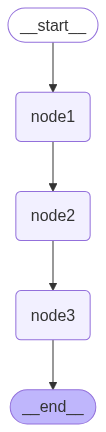

In [19]:
# Build Sequential Graph
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
graph_builder = StateGraph(State)
# add number of nodes in the graph. Here sequence of them is not mandatory.
graph_builder.add_node("node1", node1)
graph_builder.add_node("node2", node2)
graph_builder.add_node("node3", node3)

# Define the edges of graph

graph_builder.add_edge(START, "node1")
graph_builder.add_edge("node1", "node2")
graph_builder.add_edge("node2", "node3")
graph_builder.add_edge("node3", END)

graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [20]:
graph.invoke({'graph_state':""})

Node1
Node2
Node3


{'graph_state': ' Hello Hi How are you!'}